In [1]:
from google.colab import files
uploaded = files.upload()

Saving student alcohol consumption.csv to student alcohol consumption.csv


In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("student alcohol consumption.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

We have **640 samples, One row for each student**, and **32 features** that It can be a statement of **the student's status and grades**. <br>It seems that we have **no missingness** in our dataset.

In [19]:
sns.set(font_scale=1.5, rc= {'figure.figsize':(7, 5)})
sns.set_style("ticks")

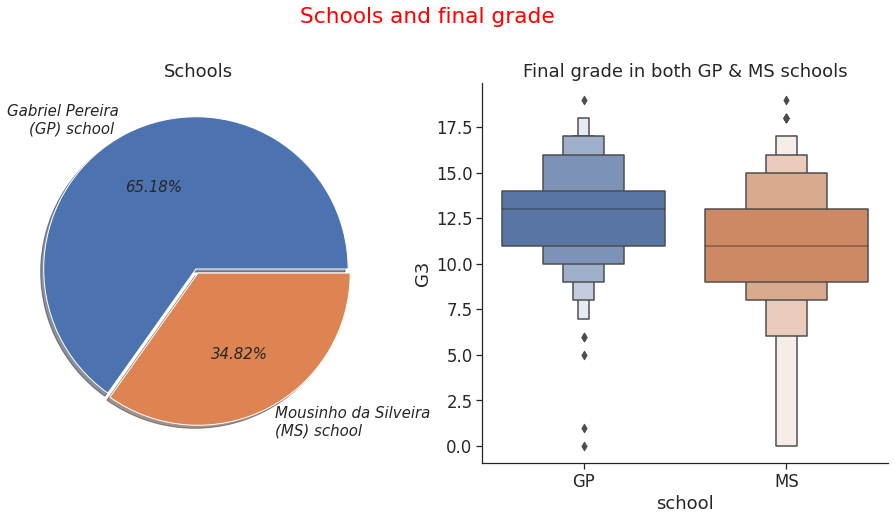

In [14]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1,)
plt.pie(data["school"].value_counts(), 
        autopct="%1.2f%%",
        explode=[0.03, 0], 
        labels=["Gabriel Pereira\n(GP) school ", "Mousinho da Silveira\n(MS) school"],
        shadow=True,
        textprops={"fontsize":15, "style":"italic"})
plt.title("Schools")

plt.subplot(1,2,2)
sns.boxenplot(data=data, x="school", y="G3")
sns.despine(right=True, )
plt.title("Final grade in both GP & MS schools")
plt.suptitle("Schools and final grade", y=1.03, color="red")

plt.show()

     Right: The percentage of students in each school.
     Left : The final grade for students in each school.
As we can see, ***There are more students from GP school than MS school***.<br>**The average score of students in GP school is heigher than MS school**.
<br> Let's find out why, and display the distribution.

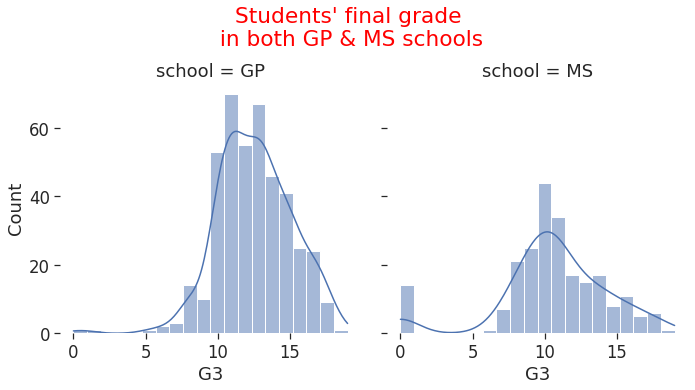

In [15]:
sns.displot(data=data, x="G3", col="school", kde=True, bins=20)
plt.suptitle("Students' final grade\n in both GP & MS schools", y=1.1, color="red")
sns.despine(left=True, bottom=True)
plt.show()

The distribution of G3 in MS is ***right skewed distribution***, which means that we have more number of students who got heigher score than students who got less score. In contrast the distribution of G3 in GP is ***left-skewed distribution*** which means we have less number of students who got less score than students who got heigher score.<br>
But the average degree of G3 in GP school is heigher than MS school, due to that GP school has mmore students who got zero in G3.<br> This may be is a ***data entry error***. So, We have to investigate to avoid skewing our analysis.

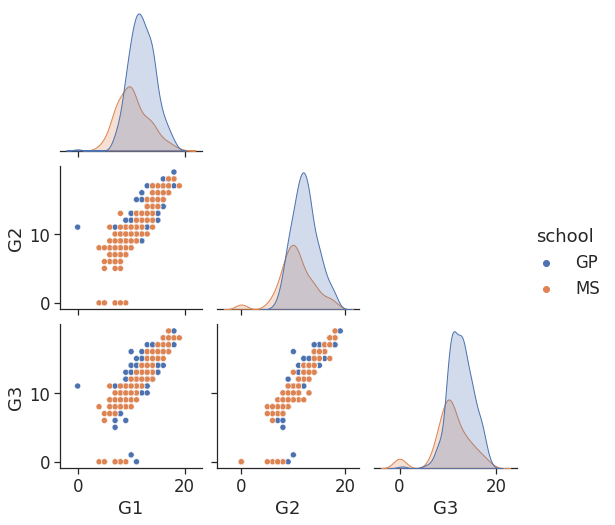

In [ ]:
sns.pairplot(data= data, vars=["G1", "G2", "G3"], hue="school", corner=True) 
plt.show()

***Interesting*** only one student who get zero in G1, But the number of students who got zeros in **G3 and G3 increased by 15 times**, as there're about **7 students got zeros in G2**, and **15 students in G3**.

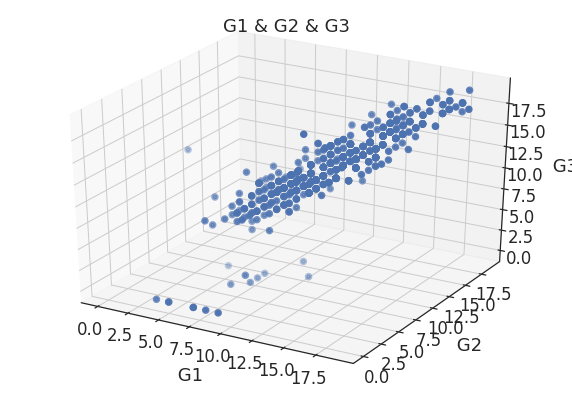

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,2)
ax = plt.axes(projection='3d')
ax.scatter3D(data["G1"], data["G2"], data["G3"],c="b", linewidth=3)

plt.title("G1 & G2 & G3")
ax.set_xlabel(' G1 ', labelpad=15)
ax.set_ylabel(' G2 ', labelpad=15)
ax.set_zlabel(' G3 ', labelpad=15)

plt.show()

***Both this 3D graph and the pairplot above prove our hypothesis***. As there is a very high-chance for **for students who got zeros in tests** to be a ***data entry error more than it is real score***.
<br>This cauld skew our analysis. So, we have to deal with.

# ***Data cleaning***

Let's replace zeroes in G1, G2 and G3 with Nan. So, We can impute.

In [20]:
col=['G1', 'G2', 'G3']
for i in col:
  data[i]= data[i].replace(0, value=np.nan)

But first we need to choose the best way to impute. So, we will try **2 different techniques KNN and Mice imputation**.

### ***Imputing missingness***.
The ***KNN imputation technique*** uses the **K-Nearest Neighbor algorithm** for predicting the missing values, finding *the most similar data points* using all the non-missing features for a data point and calculates the average of these similar points to fill the missing feature. Here, K specifies the number of similar or nearest points to consider.<br> But first let's get our dataset ready.

In [21]:
#One hot encoding technique but we exclude numeric values.
newdata= pd.get_dummies(data, columns=data.drop(['G1', 'G2', 'G3', 'age', 'absences'], axis=1).columns)

In [22]:
# Impute missingness with KNN.
from sklearn.impute import KNNImputer
# Copy newdata to data_knn_imputed.
data_knn_imputed = newdata.copy(deep=True)

# Initialize KNN with neighbors equal to 4.
knn_imputer = KNNImputer(n_neighbors=5)
# Impute using fit_tranform on data_knn_imputed.
data_knn_imputed.iloc[:, :] = knn_imputer.fit_transform(data_knn_imputed)

### ***MICE imputation*** 
It is a ***very robust and complex model*** for imputing missing values. It imputes using ***multiple regressions*** over the data and takes the ***average value*** for filling in the missing feature for a data point.

In [23]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

# Copy data to data_mice_imputed
data_mice_imputed= newdata.copy(deep=True)
mice_imputer = IterativeImputer() # Initialize IterativeImputer
# Impute using fit_tranform on data_mice_imputed
data_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(data_mice_imputed)

Chech for the best impution technique for our dataset.

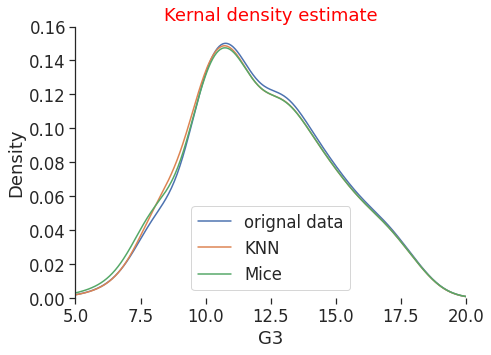

In [24]:
data["G3"].plot(kind="kde")
data_knn_imputed["G3"].plot(kind="kde")
data_mice_imputed["G3"].plot(kind="kde")

plt.legend(["orignal data", "KNN", "Mice"])
plt.xlabel('G3')
plt.axis([5,20, 0, 0.16])
plt.title("Kernal density estimate", color="red")
sns.despine(right=True, top=True, bottom=True)
plt.show()

The KNN and MICE imputations are **much more identical** to the base DataFrame with **the peak of MICE imputation being slightly shifted.** So, better to use KNN imputation.

In [25]:
knn_imputer = KNNImputer(n_neighbors=4)
newdata.iloc[:, :] = knn_imputer.fit_transform(newdata)

Overwrite the missing points with real values out from imputation.

In [26]:
col=['G1', 'G2', 'G3']
for i in col:
  data[i]=newdata[i]

In [27]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width()
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y+2), ha="right", size=15)
    plt.show()

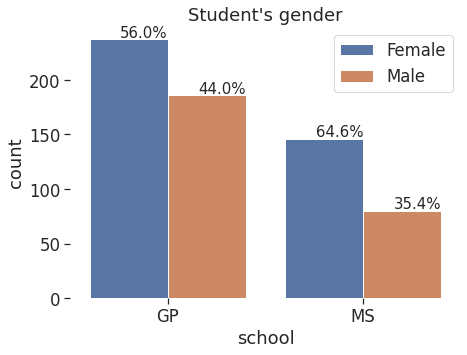

In [29]:
ax= sns.countplot(data=data, x="school", hue="sex")
plt.title("Student's gender")
plt.legend(["Female", "Male"])
sns.despine(left=True, top=True, bottom=True)
with_hue(ax, data.school, 2, 2)
plt.show()

Wether in **GP or MS shool**, there're **more females than males**.

In [ ]:
data.groupby(by=["sex", "school"])[["G1", "G2", "G3"]].mean()

G1         G2         G3
sex school                                 
F   GP      12.331224  12.502110  13.004219
    MS      10.582192  10.957192  11.458904
M   GP      11.602151  11.688172  12.088710
    MS       9.787500  10.412500  10.728125

The average score in all tests for **females is heigher than males** in both GP and MS school.<br>But for better intution, let's visualize it

In [31]:
def pointplot_average(var):
    sns.pointplot(data=data, x="school", y=var, hue="sex", 
                  estimator=np.mean, join=False, capsize=0.02)

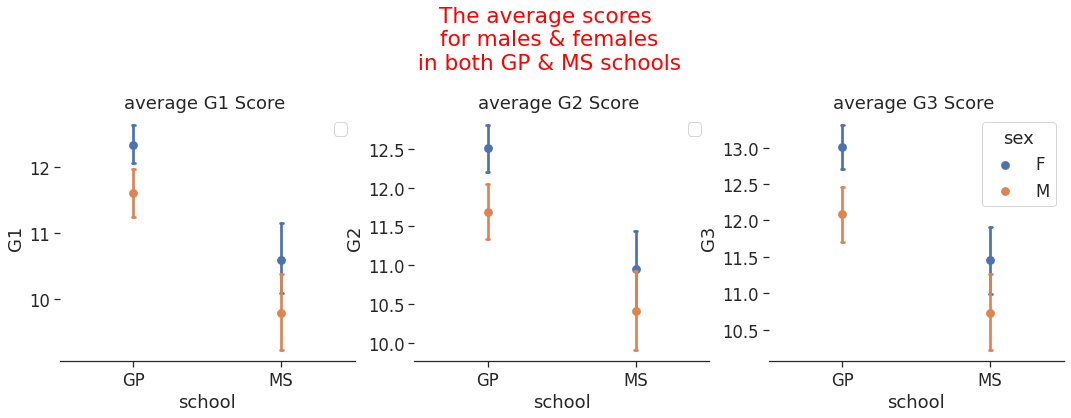

In [33]:
col= ["G1", "G2", "G3"]
fig, ax = plt.subplots(1, 3,figsize=(18,10))
fig.suptitle("The average scores\n for males & females\n in both GP & MS schools", y=1.03, color="red")
a=1
for i in col:
  plt.subplot(2,3,a)
  pointplot_average(data[i])
  if (a <3):
    plt.legend("")
  plt.title("average "+ i+" Score ")
  sns.despine(left=True)
  a=a+1

In [ ]:
#def boxenplot(var):
#    sns.boxenplot(data=data, x="school", y=var, hue="sex", showfliers=False)

#col= ["G1", "G2", "G3"]
#fig, ax = plt.subplots(1, 3,figsize=(18,10))
#fig.suptitle("The scores\n for male & females\n in both GP & MS schools", y=1.03)
#a=1
#for i in col:
#  plt.subplot(2,3,a)
#  boxenplot(data[i])
#  plt.title("average "+ i+" Score ")
#  if (a <3):
#    plt.legend("")
#  sns.despine(left=True)
#  a=a+1

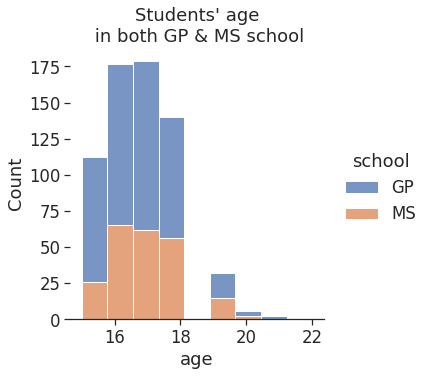

In [ ]:
sns.displot(data=data, x="age", hue="school", 
              bins=9, multiple="stack")
plt.title("Students' age\n in both GP & MS school")
sns.despine(left=True)
plt.show()

Intersting! ***Both GP and Ms school are secondary schools***, hence the students should be maximam 18 years old, But we can ***observe that we have few number of students over 20***.
<br>We can make ***hypothesis*** about the reasin we have students over 20 in GP school that those ***students had been failure for many times***. <br>As we can observe, 17 years old is the most frequent in GP school, and there're few students (3 students) that have more than 20 years old.
But in MS schools 16 years old is the most frequent and there're no students over 20 years old.

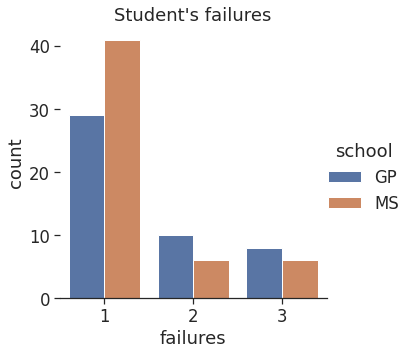

In [ ]:
sns.catplot(data= data[-(data["failures"] == 0)], x="failures", hue="school", kind="count")
plt.title("Student's failures")
sns.despine(left=True)
plt.show()

***This proves our hypothesis***, students that had been **failure for 3 times are more even split**, and more number students that fails **=< 2 time in GP school than MS**.
<br> **Due to this phenomena**, we'll get a high level of correlation between **age and failures**.

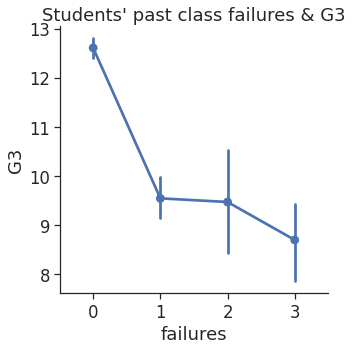

In [37]:
sns.catplot(data=data, x="failures", y="G3", kind="point", estimator=np.mean)
plt.title("Students' past class failures & G3")
plt.show()

It seems that the more in failures, the lower the expected rate in score.

### **Mather and Father education and jobs**.

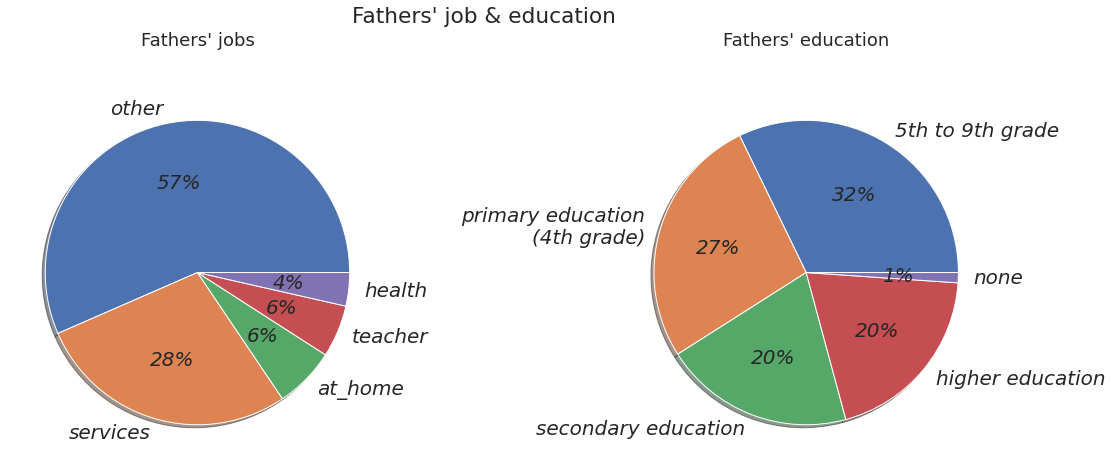

In [38]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.pie(data["Fjob"].value_counts(), 
        autopct="%1.f%%",
        labels=["other", "services", "at_home", "teacher", "health"],
        textprops={"fontsize":20, "style":"italic"},
        shadow=True)
plt.title("Fathers' jobs", y=1.08)

plt.subplot(1,2,2)
plt.pie(data["Fedu"].value_counts(), 
        autopct="%1.f%%",
        labels=[ "5th to 9th grade", "primary education\n(4th grade)", "secondary education", "higher education", "none"],
        textprops={"fontsize":20, "style":"italic"},
        shadow=True)
plt.title("Fathers' education", y=1.08)
plt.suptitle("Fathers' job & education", y=1.03)

plt.show()

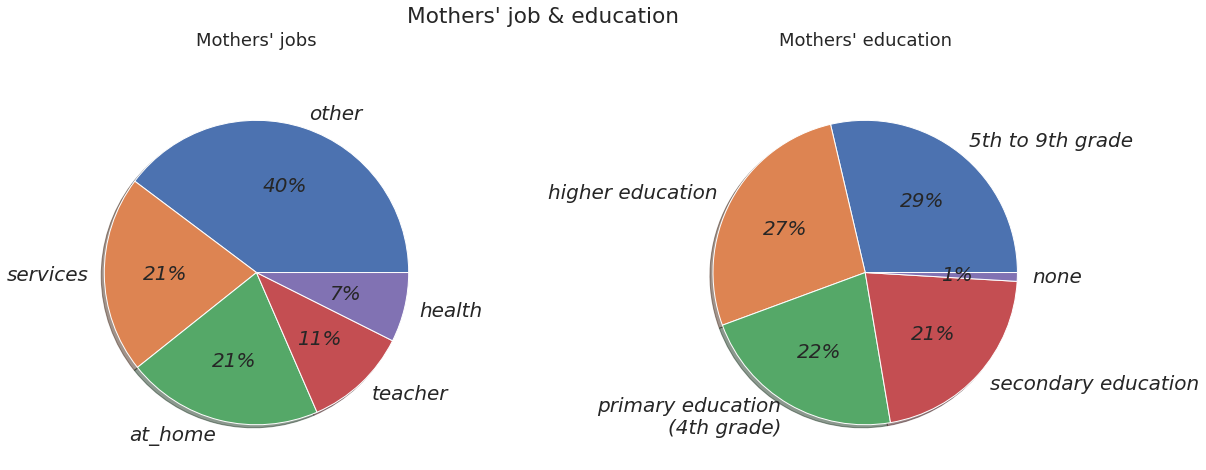

In [39]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.pie(data["Mjob"].value_counts(), 
        autopct="%1.f%%",
        labels=["other", "services", "at_home", "teacher", "health"],
        textprops={"fontsize":20, "style":"italic"},
        shadow=True)
plt.title("Mothers' jobs", y=1.08)

plt.subplot(1,2,2)
plt.pie(data["Medu"].value_counts(), 
        autopct="%1.f%%",
        labels=[ "5th to 9th grade", "higher education", "primary education\n(4th grade)", "secondary education", "none"],
        textprops={"fontsize":20, "style":"italic"},
        shadow=True)
plt.title("Mothers' education", y=1.08)
plt.suptitle("Mothers' job & education", y=1.03)

plt.show()

In [ ]:
mother_educ_job = pd.DataFrame((data.groupby("Medu").Mjob.value_counts(normalize=True)* 100).unstack()).replace(np.nan, value=0)
round(mother_educ_job)

Mjob,at_home,health,other,services,teacher
Medu,,,,,
0,50.0,0.0,50.0,0.0,0.0
1,47.0,1.0,48.0,4.0,0.0
2,22.0,3.0,51.0,25.0,0.0
3,14.0,4.0,42.0,38.0,2.0
4,3.0,21.0,19.0,18.0,39.0


In [ ]:
father_educ_job = pd.DataFrame((data.groupby("Fedu").Fjob.value_counts(normalize=True) * 100).unstack()).replace(np.nan, value=0)
round(father_educ_job)

Fjob,at_home,health,other,services,teacher
Fedu,,,,,
0,14.0,0.0,86.0,0.0,0.0
1,9.0,0.0,65.0,25.0,1.0
2,8.0,1.0,63.0,28.0,0.0
3,5.0,2.0,56.0,37.0,1.0
4,2.0,13.0,34.0,23.0,27.0


The improvements brought by data visualization can be purely cosmetic. So, let's convert this samples table of results to a nicer looking chart. 

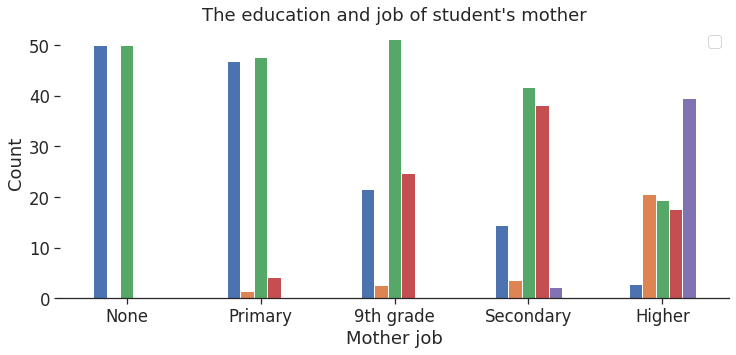

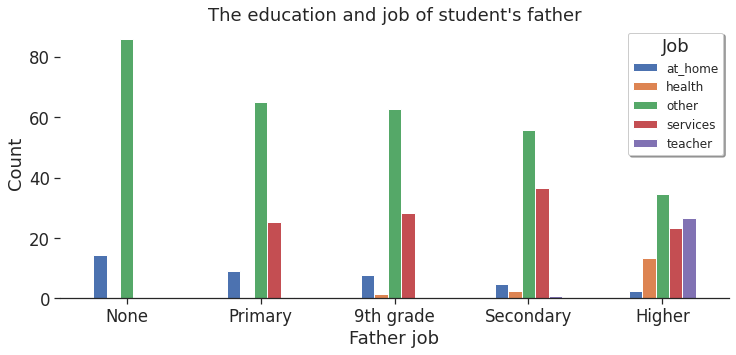

In [ ]:
mother_educ_job.plot(kind="bar", figsize=(12,5)).set_xticklabels(
    labels=["None", "Primary", "9th grade", "Secondary", "Higher"])
plt.legend("")
plt.title("The education and job of student's mother")
plt.xlabel("Mother job")
plt.ylabel("Count")
sns.despine(left=True)
plt.xticks(rotation=0)

father_educ_job.plot(kind="bar", figsize=(12,5)).set_xticklabels(
    labels=["None", "Primary", "9th grade", "Secondary", "Higher"])

plt.legend(fontsize=12, loc="upper right", shadow=True, title="Job")
plt.title("The education and job of student's father")
plt.xlabel("Father job")
plt.ylabel("Count")
sns.despine(left=True)
plt.xticks(rotation=0)

plt.show()

***Not surprisingly***, **Parents' poor education** makes their jobs just confined to **at the home or other**. And the heigher education level, the greater the diversity of jobs and the heigher rate of jobs related to **teaching and health**. 

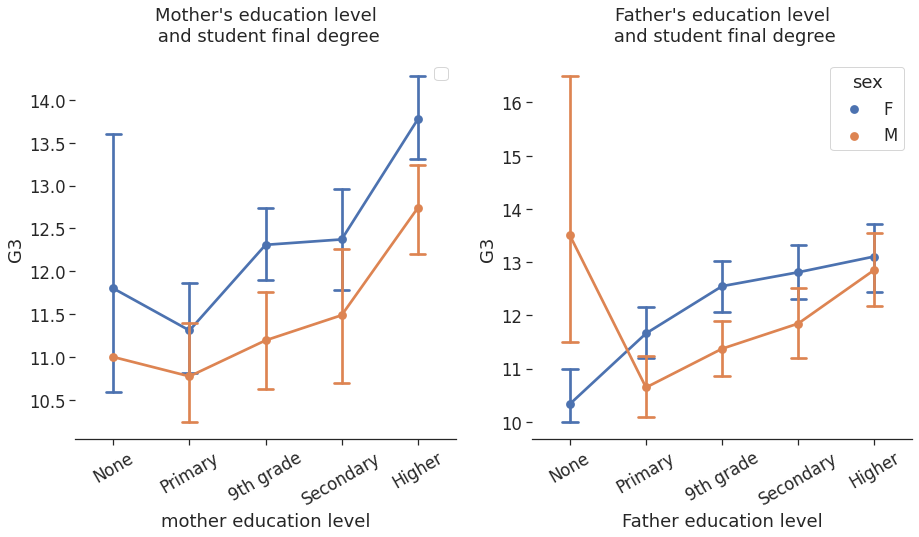

In [42]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.pointplot(data= data, x="Medu", y="G3", hue="sex", estimator=np.mean, capsize=0.2).set_xticklabels(
    labels=["None", "Primary", "9th grade", "Secondary", "Higher"], rotation=30)
sns.despine(right=True, top=True)
plt.legend("")
plt.title("Mother's education level\n and student final degree", y=1.03)
plt.xlabel("mother education level")

plt.subplot(1,2,2)
sns.pointplot(data= data, x="Fedu", y="G3", hue="sex", estimator=np.mean, capsize=0.2).set_xticklabels(
    labels=["None", "Primary", "9th grade", "Secondary", "Higher"], 
    rotation=30)
sns.despine(left=True, top=True, right=True)
plt.title("Father's education level\n and student final degree", y=1.03)
plt.xlabel("Father education level")

plt.show()

    Right: average score and mother education level.
    Left : average score and father education level.
AS we can observe **the heigher in education level fro both father and mother the heigher in average of student final degree**.
<br>Taking into account the exceptions, talents, and cases in which the rule does not apply.
We can observe in the right graph that **the heigh confidence interval(CI)** with  **female students** whose **mothers with poor level of education**, But with **male students**, almost **there is no CI**. In contrast in the left graph very littel **CI** with **female students** and very heigh **CI** with **male students**.

We can make a **hypothesis** for this **strange phenomenon** is that there're students whose **parents have a poor level of education** and this is what maked them get **lower rate of grade**, But there're **other students** whose **parents have a different level of education** where it is possible that the father or the mother has a low level of education and The other does not. 

In [ ]:
FMedu = pd.crosstab(columns= data["Medu"], index= data["Fedu"], values= data["G3"], aggfunc=np.mean)
FMedu= FMedu.replace(np.nan, 0)
round(FMedu)

Medu,0,1,2,3,4
Fedu,,,,,
0,11.0,13.0,0.0,0.0,11.0
1,10.0,11.0,12.0,12.0,11.0
2,13.0,11.0,12.0,12.0,14.0
3,0.0,10.0,12.0,12.0,13.0
4,0.0,10.0,13.0,12.0,13.0


This table proves our hypothesis.
<br> What about jobs !

In [ ]:
FMG = pd.crosstab(columns= data["Fjob"], index= data["Mjob"], values= data["G3"], aggfunc=np.mean)
round(FMG)

Fjob,at_home,health,other,services,teacher
Mjob,,,,,
at_home,12.0,11.0,11.0,11.0,11.0
health,9.0,14.0,13.0,13.0,16.0
other,11.0,11.0,12.0,12.0,12.0
services,11.0,11.0,13.0,12.0,14.0
teacher,12.0,13.0,13.0,13.0,14.0


Let's convert this table of results to a nicer looking charts.

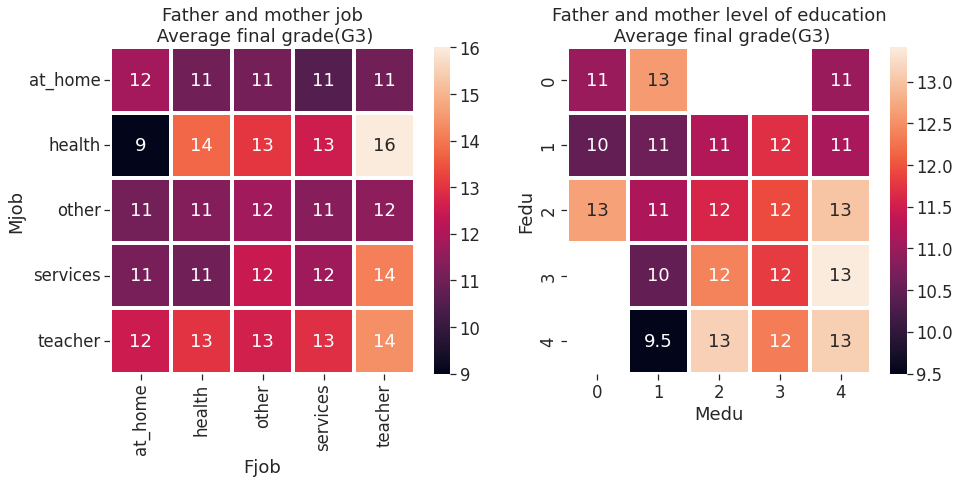

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.heatmap(FMG, linewidth=3, annot=True)
plt.title("Father and mother job\n Average final grade(G3)", y=1.1)

plt.subplot(1,2,2)
sns.heatmap(FMedu, linewidth=3, annot=True)
plt.title("Father and mother level of education\n Average final grade(G3)", y=1.1)

plt.show()

Infrequently-students can skew the results.As one  student has a solid chance to get highy score, while hundreds of students is likely to have at least one non-perfect score and this will affect the average score accordingly.
<br> We need to get the number of frequency to make more snse.

In [ ]:
count_fjob_mjob = pd.DataFrame(data.groupby(by=["Fjob"]).Mjob.value_counts()).unstack()
count.columns = count_fjob_mjob.columns.droplevel(0)
count_fjob_mjob

Mjob                              
Mjob     at_home health other services teacher
Fjob                                          
at_home       18      1    14        7       2
health         2      9     3        4       5
other         77     21   183       58      28
services      36     15    50       59      21
teacher        2      2     8        8      16

As we expected, there are only **two students** whose parents' work in ***health and teaching***, and this proves our hypothesis.
Let's convert this table of results to a nicer looking charts. But first let's get The sum of the main diameter elements(diagnal elements) to find out the number of parents working for the same job.

In [ ]:
same_job= np.trace(count_fjob_mjob) * 100/ len(data)
round(same_job, 2)

43.91

Well, It seems that about 44% of parents in our dataset are working for the same job, and this leads to heighly coorelation.

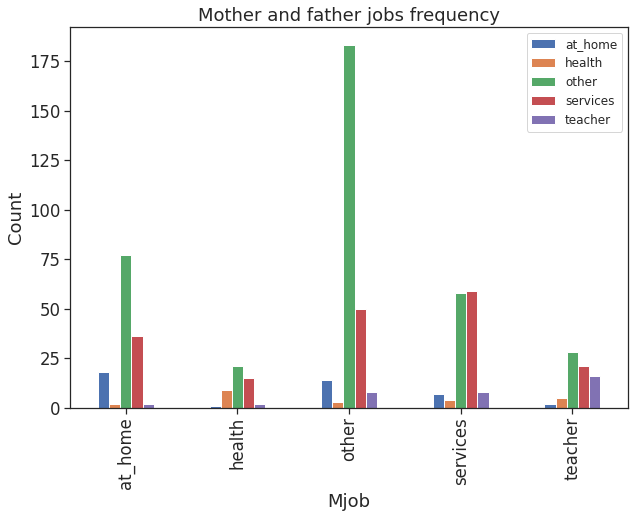

In [ ]:
count.plot(kind="bar")
plt.legend(fontsize=12)
plt.title("Mother and father jobs frequency")
plt.ylabel("Count")
plt.show()

### **Feature engineering**.

In [ ]:
data["M_Fjob"]= data.Mjob + " " + data.Fjob
data["M_Fjob"].unique()

array(['at_home teacher', 'at_home other', 'health services',
       'other other', 'services other', 'other teacher', 'teacher health',
       'teacher other', 'health other', 'services services',
       'health health', 'services health', 'teacher teacher',
       'teacher at_home', 'teacher services', 'services teacher',
       'other at_home', 'other services', 'health teacher',
       'other health', 'at_home services', 'services at_home',
       'at_home at_home', 'at_home health', 'health at_home'],
      dtype=object)

Let's collapse categories in **M_Fjob column** that we have just created into few.

In [ ]:
mapping= {"teacher teacher": "teacher", "other other": "other", "services services": "services", 
          "health health": "health", "at_home at_home": "at_home"}

data["M_Fjob"]= data["M_Fjob"].replace(mapping)
data["M_Fjob"].nunique()

25

In [ ]:
categories= ["teach", "services", "health", "at_home", "other", 'at_home other', 
             'health services', 'services other', 'other teacher', 'teacher health',
             'health other', 'teacher at_home', 'teacher services', 'services at_home', 'health at_home']

In [ ]:
from fuzzywuzzy import process
for jobs in categories:
  matches = process.extract(jobs, data["M_Fjob"], limit = data.shape[0])
  for potential_match in matches:
    if potential_match[1] >=  95:
      data.loc[data['M_Fjob'] == potential_match[0], 'M_Fjob'] = jobs

In [ ]:
data["M_Fjob"].unique()

array(['teacher at_home', 'at_home other', 'health services', 'other',
       'services other', 'other teacher', 'teacher health',
       'health other', 'services', 'health', 'teacher',
       'teacher services', 'services at_home', 'at_home',
       'health at_home'], dtype=object)

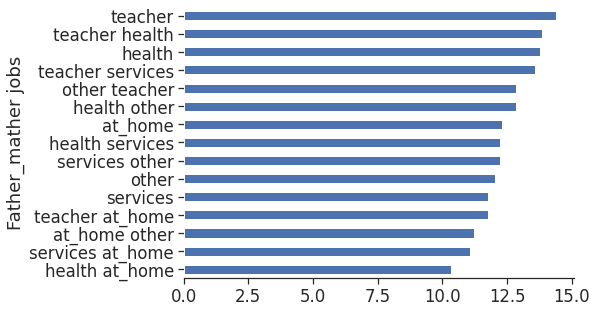

In [ ]:
F_M_job= data.groupby("M_Fjob").G3.mean().sort_values()
F_M_job.plot(kind="barh")
plt.ylabel("Father_mather jobs")
sns.despine(right=True, left=True, top=True)
plt.show()

In [ ]:
data.drop(["Mjob", "Fjob"], inplace=True, axis=1)

### ***Reasons to choose this school***.
---

In [44]:
reasons= pd.DataFrame(data.groupby(by= ["reason", "address"]).school.value_counts(normalize=True) * 100).unstack()
round(reasons)

school      
school                 GP    MS
reason     address             
course     R         37.0  63.0
           U         70.0  30.0
home       R         40.0  60.0
           U         85.0  15.0
other      R         13.0  87.0
           U         55.0  45.0
reputation R         62.0  38.0
           U         88.0  12.0

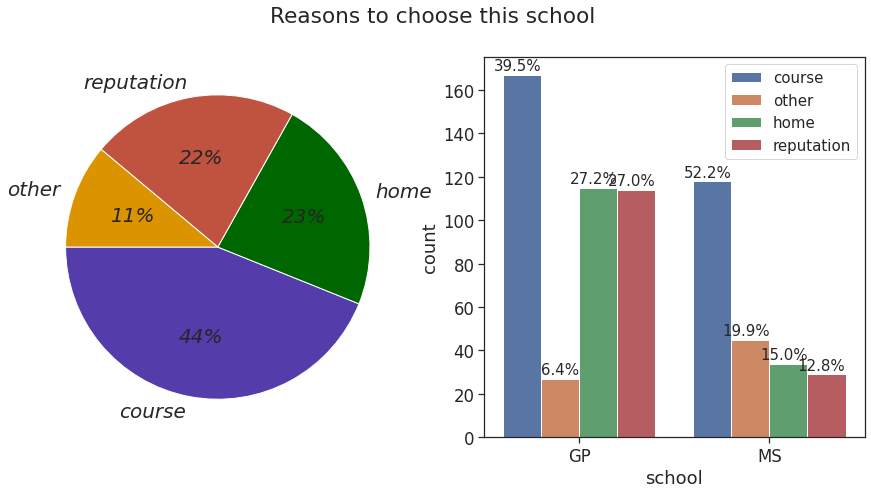

In [ ]:
plt.figure(figsize=(15,7))
plt.suptitle("Reasons to choose this school")
plt.subplot(1,2,1)
plt.pie(x=data["reason"].value_counts(), 
        autopct="%1.f%%",
        startangle=180,
        labels=["course", "home", "reputation", "other"],
        colors=["#543caa","#006600", "#bf5340", "#dc9300"],
        textprops={"fontsize":20, "style":"italic"})

plt.subplot(1,2,2)
ax= sns.countplot(data=data, x="school", hue="reason")
plt.legend(fontsize=15)
with_hue(ax, data.school, 2, 4)

plt.show()

    Right: Distribution of reasons for choosing students for each school.
    Left: The reasons to choose the exact school 
    where home: close to home, reputation: school reputation, course: course preference or 'other') 


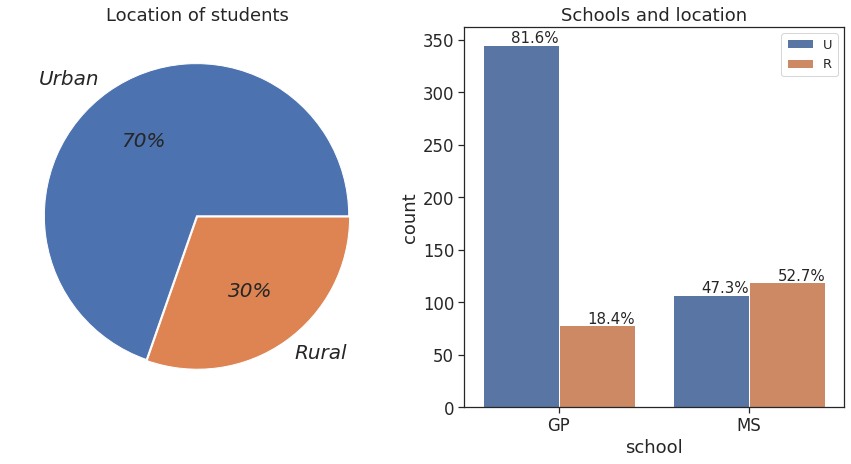

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.pie(data["address"].value_counts(), 
        autopct="%1.f%%",
        explode=[0.01, 0], 
        labels=["Urban", "Rural"],
        textprops={"fontsize":20, "style":"italic"})
plt.title("Location of students")

plt.subplot(1,2,2)
ax= sns.countplot(x="school", data=data, hue="address")
plt.title("Schools and location")
plt.legend(fontsize=13)
with_hue(ax, data.school, 2,2)

plt.show()

Students at GP tend to come from an urban location, but students at MS are more evenly split.<br> What is the relation between traveltime, address & school.

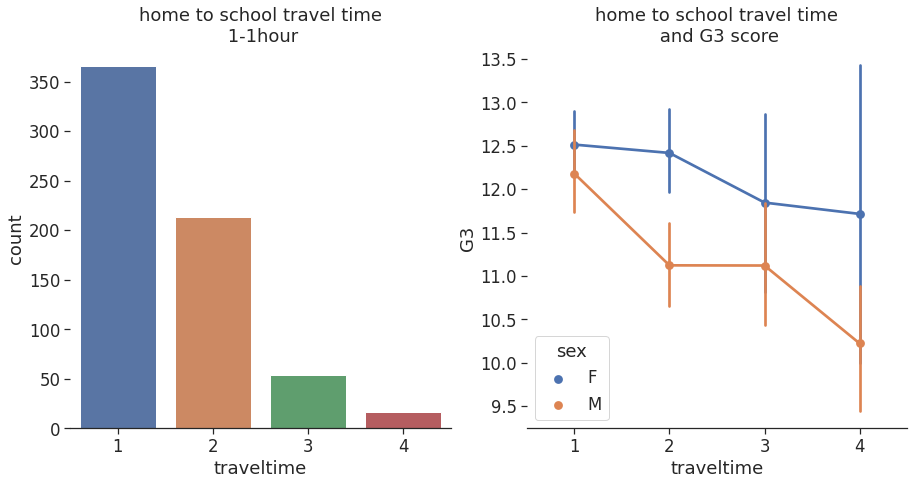

In [50]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
sns.countplot(data=data, x="traveltime")
sns.despine(left=True, right=True, top=True)
plt.title("home to school travel time\n 1-1hour")

plt.subplot(1,2,2)
sns.pointplot(data=data, x="traveltime", y="G3", hue="sex", estimator=np.mean)
sns.despine(left=True, right=True, top=True)
plt.title("home to school travel time\n and G3 score")
plt.show()

In [ ]:
#data.drop("traveltime", axis=1, inplace=True)

It seems that the more travel time the less expected rate score, But it does not make much different.

In [ ]:
travel_time =(data.groupby(by=[ "school", "address", "reason"]).traveltime.value_counts(normalize=True)*100).unstack().replace(np.nan, value=0)
round(travel_time)

traveltime                    1     2     3     4
school address reason                            
GP     R       course      39.0  31.0  17.0  14.0
               home        50.0  30.0  10.0  10.0
               other       75.0  25.0   0.0   0.0
               reputation  39.0  61.0   0.0   0.0
       U       course      66.0  23.0   7.0   4.0
               home        75.0  25.0   0.0   0.0
               other       87.0  13.0   0.0   0.0
               reputation  74.0  21.0   5.0   0.0
MS     R       course      20.0  56.0  23.0   2.0
               home        27.0  40.0  20.0  13.0
               other       27.0  38.0  31.0   4.0
               reputation  41.0  41.0  18.0   0.0
       U       course      54.0  42.0   4.0   0.0
               home        63.0  37.0   0.0   0.0
               other       32.0  53.0  11.0   5.0
               reputation  33.0  50.0  17.0   0.0

<Figure size 720x504 with 0 Axes>

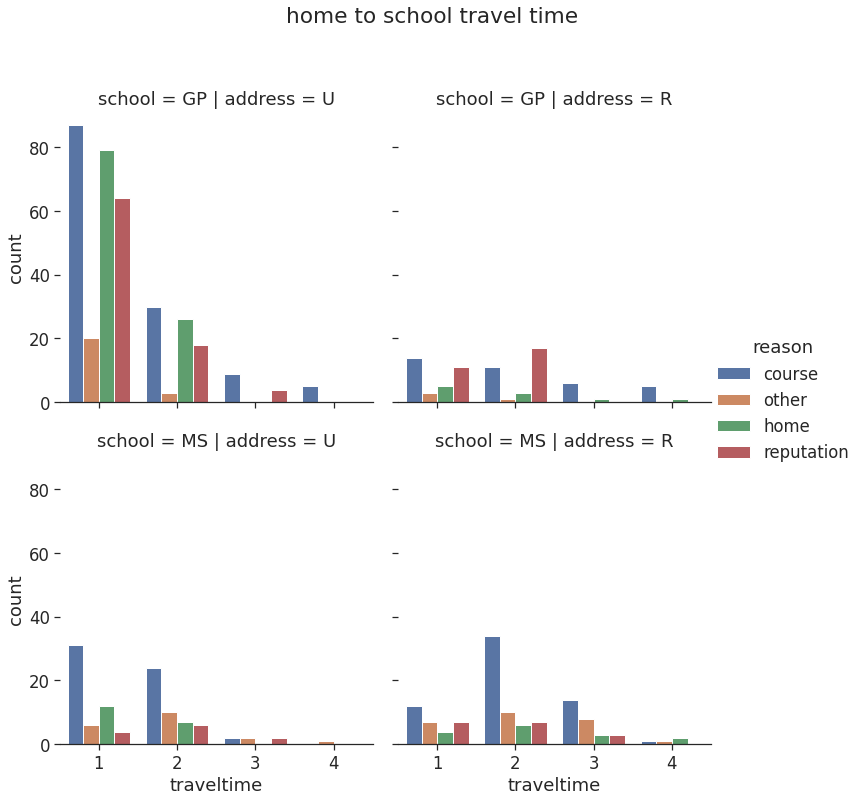

In [ ]:
plt.figure(figsize=(10,7))
sns.catplot(data=data, kind="count", x="traveltime", hue="reason", 
             col="address", row="school")
sns.despine(left=True)

plt.suptitle("home to school travel time", y=1.09)
plt.show()

Does absence affect on the final grade ?

---

In [ ]:
pd.DataFrame(data.groupby(["school", "sex"]).absences.mean())

absences
school sex          
GP     F    4.405063
       M    3.973118
MS     F    2.232877
       M    3.325000

The absence rates in GP School are twice the absence rates in MS School <br> Let's find out why


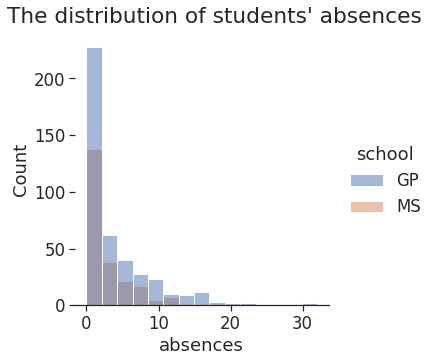

In [ ]:
sns.displot(data=data, x="absences", hue="school", bins=15)
sns.despine(left=True)
plt.suptitle("The distribution of students' absences", y=1.02)
plt.show()

AS we can see, Most students had not been absent ever, and the distribution is ***right-skewed shape*** which means that we have a few number of students who had been absent for many times

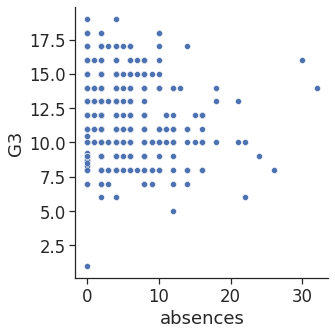

In [51]:
sns.relplot(data=data, x="absences", y="G3", kind="scatter")
plt.show()

It looks like students with higher absences tend to have lower grades. But this plot is slightly confusing. Obviously we have outliers. But Let's find out more.

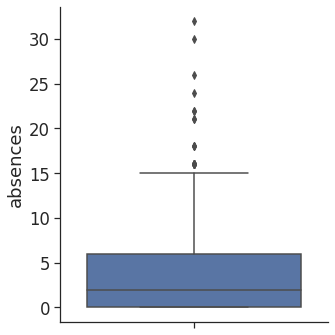

In [ ]:
sns.catplot(data=data, y="absences", kind="box")
plt.show()

This proves our hypothesis. Let's deal with 

In [52]:
newdata.loc[newdata["absences"]>= 15, "absences"]=np.nan

In [53]:
knn_imputer = KNNImputer(n_neighbors=5)
newdata.iloc[:, :] = knn_imputer.fit_transform(newdata)

Overwright the values in the absences column.

In [54]:
data["absences"] = newdata["absences"]

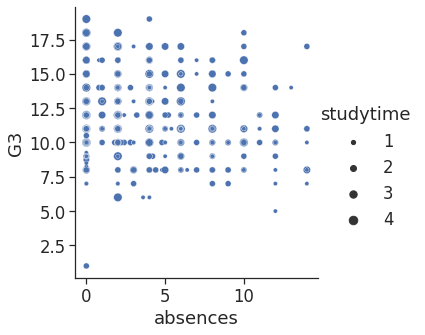

In [74]:
sns.relplot(data=data, x="absences", y="G3", kind="scatter", size="studytime")
plt.show()

As we mention before, Students with higher absences tend to have lower grades. But we can observe that there are **some students don't follow this battern**, and this because of **studytime**.

Does the quality of the student's family relationship influence the number of absences the student has in school?

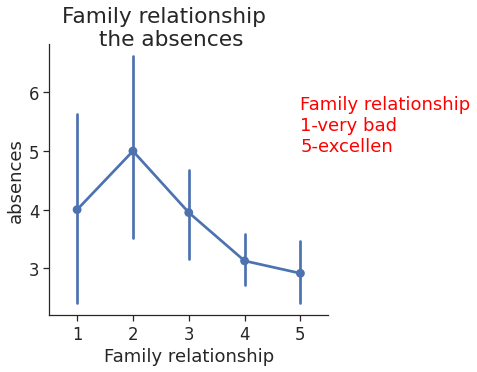

In [ ]:
sns.catplot(data= data, x="famrel", y="absences", kind="point")
plt.suptitle("Family relationship \n the absences", y=1.05)
plt.text(4,5, "Family relationship\n1-very bad\n5-excellen", color="red")

plt.xlabel("Family relationship")
plt.show()

what about going out with friends

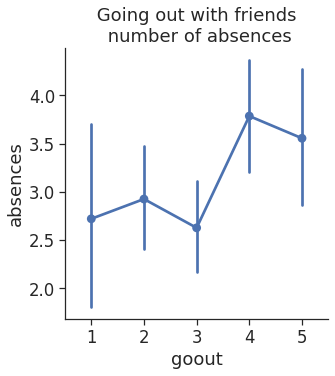

In [79]:
sns.catplot(data= data, x="goout", y="absences", kind="point")
plt.title(" Going out with friends \n number of absences", y=1.05)
plt.show()

Do students who report higher amounts of studying tend to get better final grades? <br>Let's compare the average final grade among students.

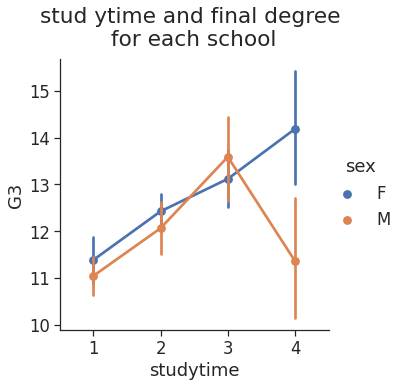

In [76]:
sns.catplot(data=data, x="studytime", y="G3", kind="point", hue="sex")
plt.suptitle("stud ytime and final degree\n for each school", y=1.09)
plt.show()

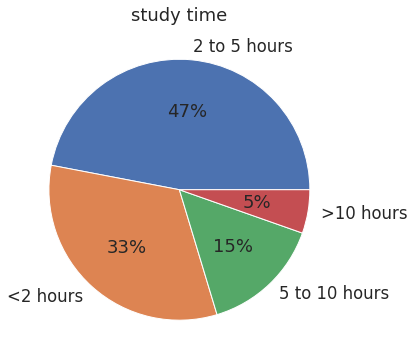

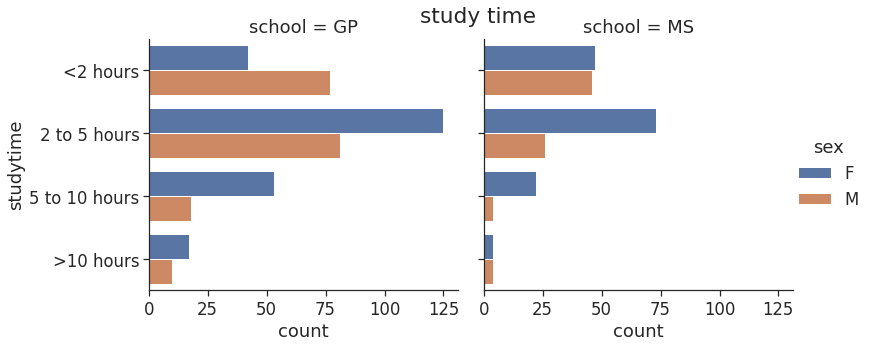

In [ ]:
plt.pie(data["studytime"].value_counts(), 
        labels=["2 to 5 hours","<2 hours", "5 to 10 hours", ">10 hours"],
        autopct="%1.f%%")
plt.title("study time")

sns.catplot(data=data, y="studytime",kind="count", hue="sex", col="school").set_yticklabels(
    labels=["<2 hours", "2 to 5 hours",  "5 to 10 hours", ">10 hours"])

plt.suptitle("study time")
plt.show()

In [ ]:
pd.DataFrame(data.groupby("school").schoolsup.value_counts(normalize= True ) * 100).unstack()

schoolsup           
schoolsup         no        yes
school                         
GP         86.761229  13.238771
MS         94.690265   5.309735

Students in GP recieve more more education support than those who're in MS.
But for better intution, let's visualize it.

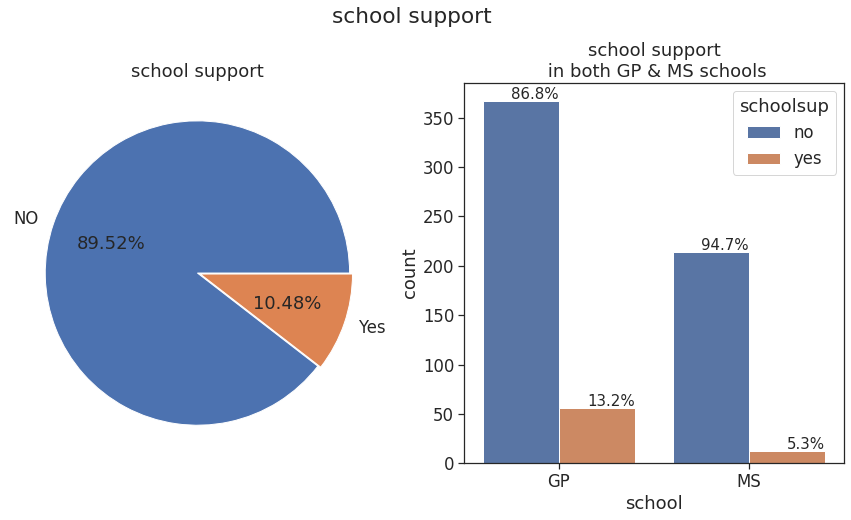

In [ ]:
plt.figure(figsize=(15,7))
plt.suptitle("school support", y=1.03)
plt.subplot(1,2,1)
plt.pie(data["schoolsup"].value_counts(), labels=["NO", "Yes"], 
        autopct="%1.2f%%", explode=[0, 0.02])
plt.title("school support")

plt.subplot(1,2,2)
plt.title("school support\n in both GP & MS schools")
ax= sns.countplot(data=data, x="school", hue="schoolsup", hue_order=["no", "yes"])
with_hue(ax, data.school, 2,2)

plt.show()

In [ ]:
(data.groupby(by="school").activities.value_counts(normalize=True) *100 ).unstack()

activities,no,yes
school,,
GP,48.226950,51.773050
MS,57.522124,42.477876


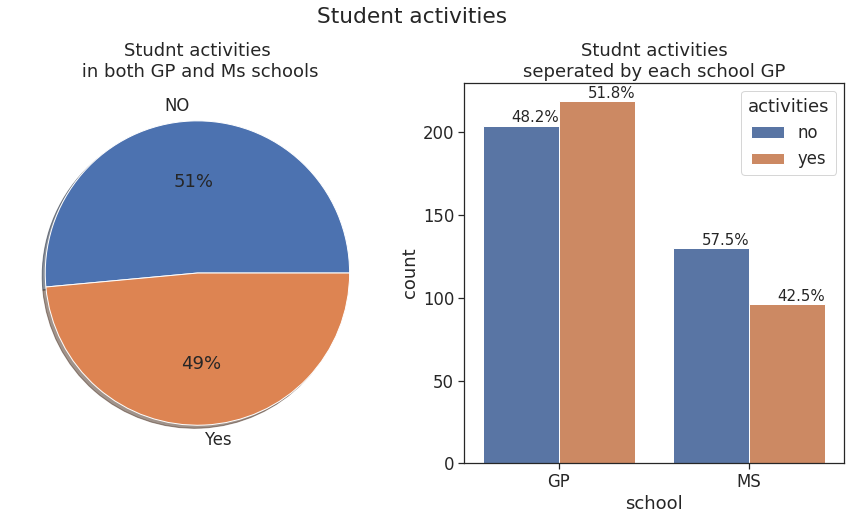

In [ ]:
plt.figure(figsize=(15,7))
plt.suptitle("Student activities", y=1.03)
plt.subplot(1,2,1)
plt.pie(data["activities"].value_counts(), 
        labels=["NO", "Yes"], shadow=True,
        autopct="%1.f%%")
plt.title("Studnt activities\n in both GP and Ms schools")

plt.subplot(1,2,2)
plt.title("Studnt activities\nseperated by each school GP")
ax= sns.countplot(data=data, x="school", hue="activities")
with_hue(ax, data.school, 2,2)

plt.show()

There are many aspects of a student's life that could result in a higher or lower final grade in the class. For example, some **students receive extra educational support from their school or from their family** , and **student activities** which could result in **higher grades**.Let's try to control for these two factors by creating subplots based on whether the student received extra educational support from their school or family.

In [ ]:
supact = pd.DataFrame((data.groupby(by=["schoolsup", "famsup", "activities"]).G3.mean()).unstack())
round(supact, 3)

activities            no     yes
schoolsup famsup                
no        no      11.845  12.448
          yes     12.058  12.385
yes       no      10.833  10.714
          yes     11.385  11.978

It seems that **student activities** are a stronger factor than **school and family support**.

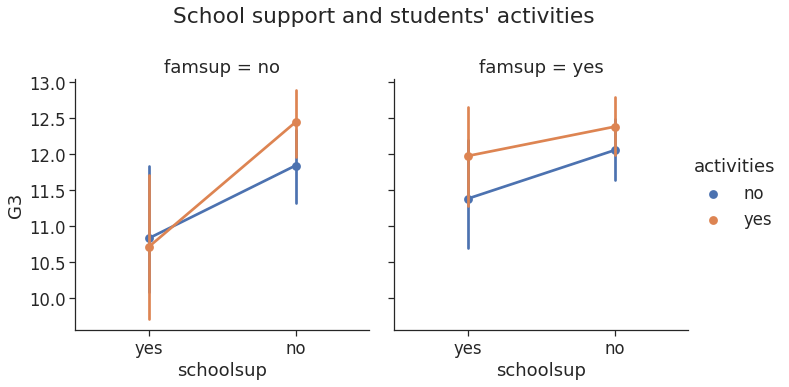

In [ ]:
sns.catplot(data=data, kind="point", x="schoolsup", y="G3", col="famsup", hue="activities")
plt.suptitle("School support and students' activities", y=1.09)
plt.show()

In [ ]:
supact = pd.DataFrame((data.groupby(by=["school", "schoolsup"]).activities.value_counts(normalize=True)* 100).unstack())
round(supact, 3)

activities            no     yes
school schoolsup                
GP     no         47.956  52.044
       yes        50.000  50.000
MS     no         56.075  43.925
       yes        83.333  16.667

Now let's compare the distribution of final grades between students who have internet access at home and those who don't. 

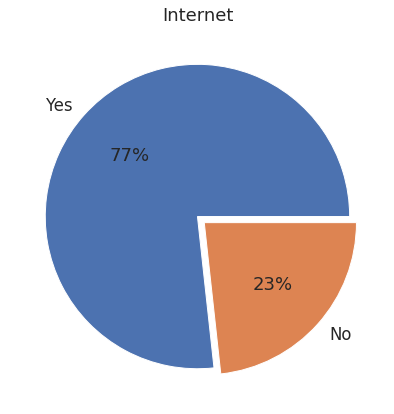

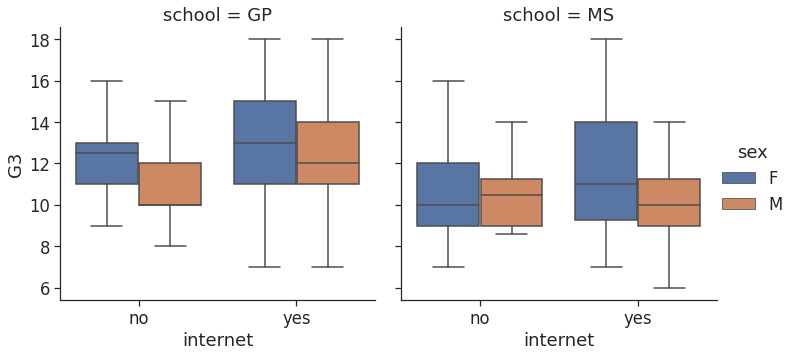

In [ ]:
plt.pie(data["internet"].value_counts(), 
        labels=["Yes", "No"],
        autopct="%1.f%%",
        explode=[0, 0.06])
plt.title("Internet")

sns.catplot(data=data, x="internet", y="G3", kind="box",
            hue="sex", col="school", sym="")
plt.show()

It seems that students who have access internet home tend to get a heigher rate in G3.

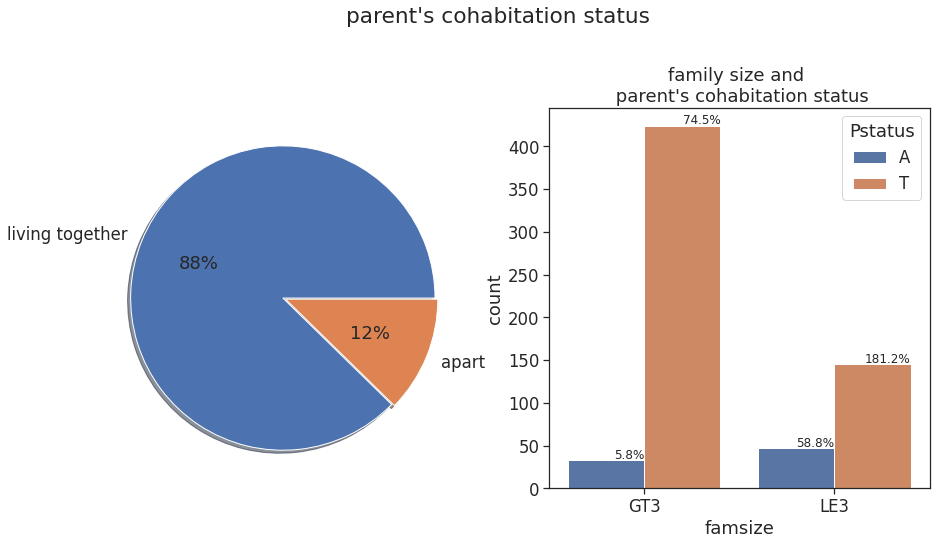

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.pie(x=data["Pstatus"].value_counts(),
        labels=["living together", "apart"],
        autopct="%1.f%%",
        explode=[0, 0.02], 
        shadow=True)

plt.suptitle("parent's cohabitation status", y=1.08)

plt.subplot(1,2,2)
ax= sns.countplot(data=data, x="famsize", hue="Pstatus")
plt.title("family size and \n parent's cohabitation status")
with_hue(ax, data.Pstatus, 2, 2)
#.set_xticklabels(labels=["Greater than 3", "less than 3"])

plt.show()


In [ ]:
(data.groupby(by="famsize").Pstatus.value_counts(normalize=True)* 100).unstack()

Pstatus,A,T
famsize,,
GT3,7.221007,92.778993
LE3,24.479167,75.520833


It seems that family size has a grest effect on by parent's cohabitation status, as family with less than 3 members is apart at a heigher rate than family with greater than 3. 

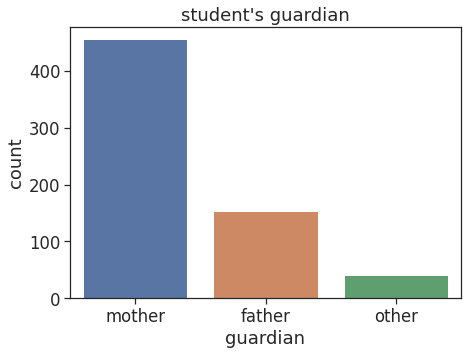

In [78]:
sns.countplot(data= data, x="guardian")
plt.title("student's guardian")
plt.show()

In [ ]:
(data.groupby(by=["Pstatus", "sex"]).guardian.value_counts(normalize=True) * 100).unstack()

guardian        father     mother      other
Pstatus sex                                 
A       F     7.407407  77.777778  14.814815
        M     7.692308  80.769231  11.538462
T       F    24.620061  70.212766   5.167173
        M    27.500000  67.083333   5.416667

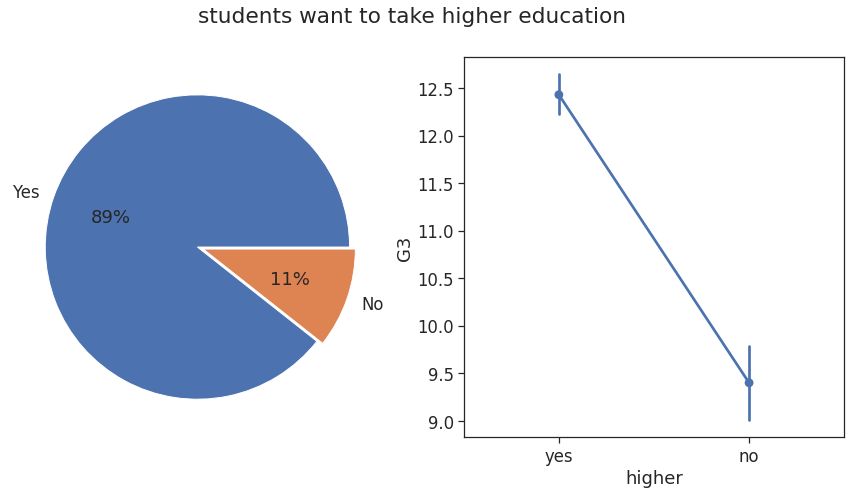

In [ ]:
plt.figure(figsize=(15,7))
plt.suptitle("students want to take higher education")
plt.subplot(1,2,1)
plt.pie(data["higher"].value_counts(), 
        labels=["Yes", "No"], autopct="%1.f%%", explode=[0, 0.04])

plt.subplot(1,2,2)
sns.pointplot(data=data, x="higher", y="G3", estimator=np.mean)
plt.show()

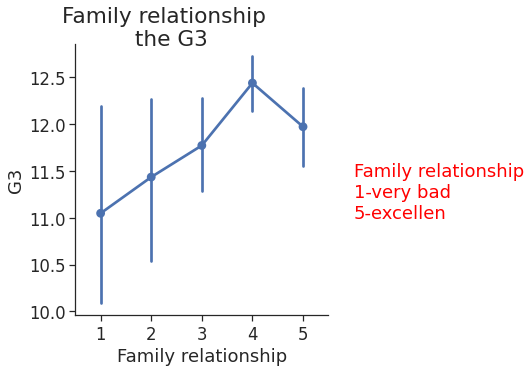

In [ ]:
sns.catplot(data= data, x="famrel", y="G3", kind="point")
plt.suptitle("Family relationship \n the G3", y=1.05)
plt.text(5,11, "Family relationship\n1-very bad\n5-excellen", color="red")

plt.xlabel("Family relationship")
plt.show()

Being in a romantic relationship associated with higher or lower school attendance? 

And does this association differ by which school the students attend?

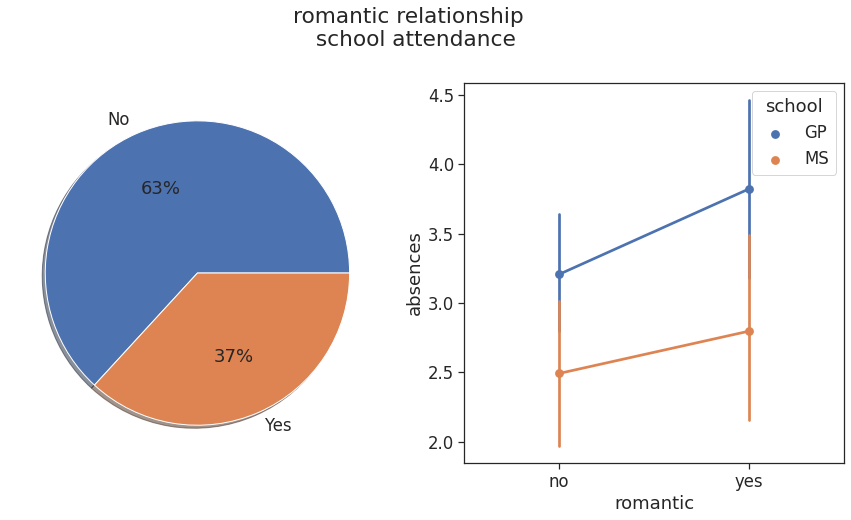

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
plt.pie(x=data["romantic"].value_counts(),
        labels=["No", "Yes"], 
        autopct="%1.f%%", shadow=True)

plt.subplot(1,2,2)
# Create a point plot with subgroups
sns.pointplot(data= data, x="romantic", y="absences", hue="school")

plt.suptitle("romantic relationship \n school attendance", y=1.03)
# Show plot
plt.show()

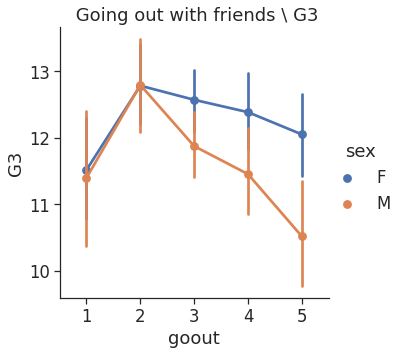

In [ ]:
sns.catplot(data= data, x="goout", y="G3", hue="sex", kind="point")
plt.title(" Going out with friends \ G3", y=1.05)
plt.show()

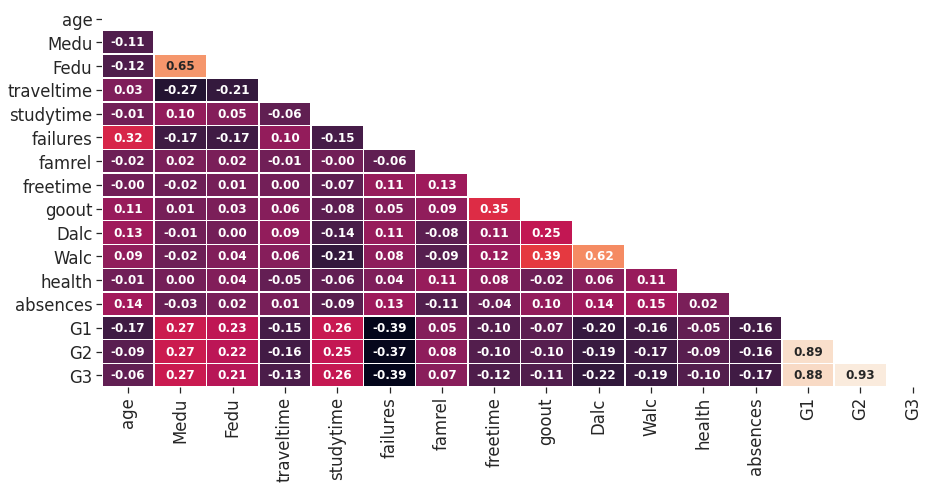

In [ ]:
plt.figure(figsize=(15,7))

corr = data.corr()
mask = np.triu(corr)
sns.heatmap(corr, linewidths=0.5, annot= True, mask= mask, cbar= False,
            fmt=".2f", annot_kws={"fontsize":12, "weight":'bold'}).set_facecolor('white')
plt.show()

In [ ]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(newdata, method='complete')

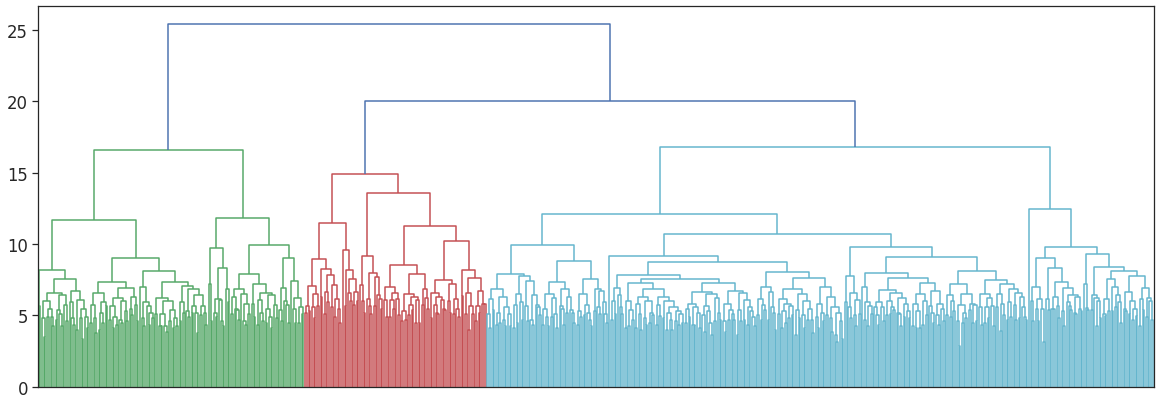

In [ ]:
plt.figure(figsize=(20,7))
# Plot the dendrogram, using varieties as labels
dendrogram(mergings, no_labels=True)
plt.show()

In [ ]:
from scipy.cluster.vq import kmeans, vq

In [ ]:
distortions = []
num_clusters = range(1, 7)
# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(newdata.values.astype(float), i)
    distortions.append(distortion)

In [ ]:
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

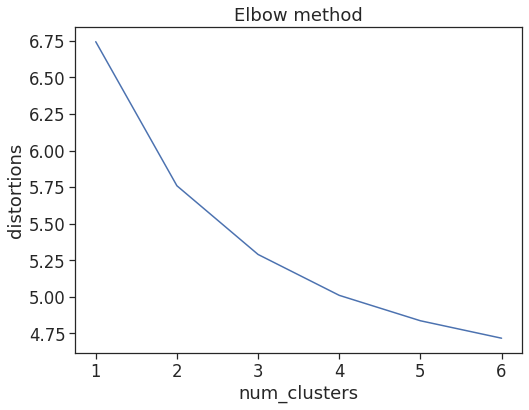

In [ ]:
# Creat a line plot of num_clusters and distortions
sns.lineplot(data = elbow_plot, x='num_clusters', y='distortions')
plt.title("Elbow method")
plt.xticks(num_clusters)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(newdata)

In [ ]:
data["clusters"] = clusters

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=100)

In [ ]:
# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(newdata)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


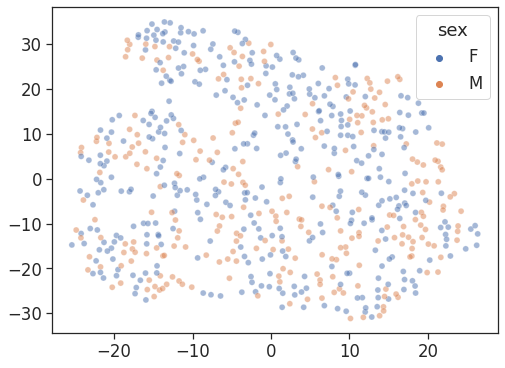

In [ ]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
sns.scatterplot(xs, ys, alpha=0.5, hue=data.sex)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
# Create PCA instance: model
model = PCA()
# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(newdata)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


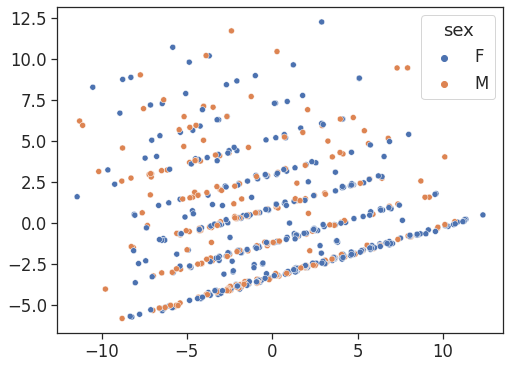

In [ ]:
xs = pca_features[:,0]
ys = pca_features[:,1]

sns.scatterplot(xs, ys, hue=data.sex)
plt.show()


In [ ]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

-8.718785365592002e-16


as we can observe there're some students who got zero in the exams

## ***Building a machine learning model.***

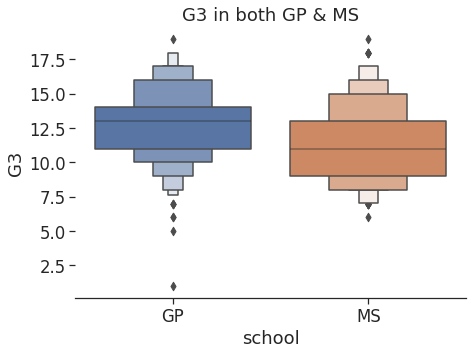

In [82]:
sns.boxenplot(data=data, y="G3", x="school")
sns.despine(left=True, top=True)
plt.title("G3 in both GP & MS")
plt.show()

About 3 students got score less than 5, and this is represented as outlier

In [155]:
newdata.loc[newdata["G3"]<= 6, "G3"]=np.nan

In [156]:
knn_imputer = KNNImputer(n_neighbors=5)
newdata.iloc[:, :] = knn_imputer.fit_transform(newdata)

In [157]:
data["G3"]= newdata["G3"]

### ***Data preprocessing***.
**let's split our dataset into training and testing.**

In [158]:
X, Y= newdata.drop("G3", axis=1), newdata["G3"]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

The first algorithm we will try is LinearRegression to map and predict.

In [159]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train, y_train)
lmpredictions = lm.predict(x_test)

In [93]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

We will create a method to get the error for every model we try.

In [160]:
def error_function(prediction):
  print("The mean squared error : ", mean_squared_error(y_test, prediction))
  print("The absolute sum of actual and predicted differences : ", mean_absolute_error(y_test, prediction))

In [161]:
error_function(lmpredictions)

The mean squared error :  0.7069317176933758
The absolute sum of actual and predicted differences :  0.6810033240685096


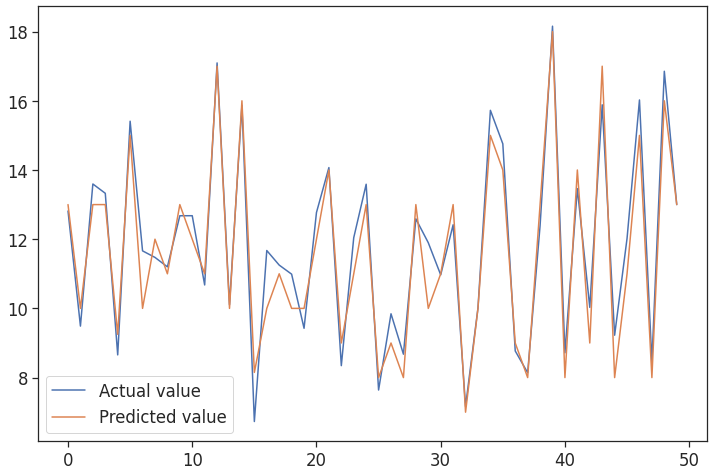

In [163]:
test = pd.DataFrame({'Predicted value':lmpredictions, 'Actual value':y_test})
fig= plt.figure(figsize=(12,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])
plt.show()

We will try anther model to predict called RandomForestRegressor.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=300)
RF_model.fit(x_train, y_train)
RF_predictions = RF_model.predict(x_test)

In [ ]:
error_function(RF_predictions)

The mean squared error :  0.5144484060512818
The absolute sum of actual and predicted differences :  0.5632328205128203


#### Tuning hyperparameters

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 150, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
random_state=np.arange(0,20, 1)
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
knn_cv = RandomizedSearchCV(RF_model, random_grid, n_iter=5, cv=5)
knn_cv.fit(x_train, y_train)
predictions= knn_cv.predict(x_test)

In [ ]:
knn_cv.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 2000,
 'random_state': 10}

In [ ]:
error_function(predictions)

The mean squared error :  0.6143155406070506
The absolute sum of actual and predicted differences :  0.6318424528026058


It semms that **tuning hyperparmeters does not make any defferences**, we'll try anther model callled **XGBoost**.

In [167]:
import xgboost as xgb

In [172]:
XGB_model= xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 300, seed = 123)
XGB_model.fit(x_train, y_train)
XGB_predictions = XGB_model.predict(x_test)

[16:23:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [173]:
error_function(XGB_predictions)

The mean squared error :  0.7352559371149567
The absolute sum of actual and predicted differences :  0.6742715938274677


In [ ]:
param_grid = {'learning_rate' : [0.05, 0.10, 0.20],  
          'min_child_weight': [1, 5, 10],  
          'gamma': [0.5, 1, 5],  
          'subsample': [0.6, 0.8, 1.0],  
          'colsample_bytree': [0.6, 0.8, 1.0],  
           'max_depth': [3, 4, 5]  
         }

In [ ]:
model = xgb.XGBRegressor(random_state=1, verbosity=1)

grid_search = RandomizedSearchCV(model,
                           param_grid, 5,
                           'neg_root_mean_squared_error')
grid_search.fit(x_train, y_train)
predictions= grid_search.predict(x_test)

In [ ]:
error_function(predictions)

The mean squared error :  0.6143155406070506
The absolute sum of actual and predicted differences :  0.6318424528026058
